In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#parabola
def function_for_roots(x): #define the function we want to take the roots of
    a = 1.01
    b = -3.04
    c = 2.07
    
    return a*x**2 + b*x + c  #get the roots of quadratic


In [87]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check if our initial guess is valid
    y_min = f(x_min)  #left side of the bracket
    y_max = f(x_max) #right side of the bracket
    
    #check that x_min and x_max contain a zero crossing
    if(y_min*y_max>=0.0): #we know they are on the same side of the root
        print("No zero crossing found in the range = ",x_min,x_max)
        s = "f(%f) = %f, f(%) = %f" % (x_min,y_min,x_max,y_max) #define the string
        print(s)
        return 0 
    
    #if x_min is a root, then return flag == 1
    if(np.fabs(y_min)<tol):
        return 1
    
    #if x_max is a root, then return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point, our guess was incorrect and we must use
    #the valid bracket to proceed
    return 3

In [88]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    #this function uses bisection search to find a root
    
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    imax = 10000
    i = 0
    
    #check the initial values
    flag = check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    
    #if we reach here, then we need to conduct the search
    
    #set a flag
    flag = 1
    
    while(flag):
        x_mid = 0.5*(x_min+x_max)
        y_mid = f(x_mid)
        
        #here we check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #x_mid is not a root
            
            if(f(x_min)*f(x_mid)>0):
                x_min = x_mid
            else:
                x_max = x_mid
        #print out the iteration
        print(x_min,f(x_min),x_max,f(x_max))
               
        #count the iteration
        i += 1
               
         #if we have exceeded the max number of iterations, exit
        if(i>=imax):
            print("Exceeded max number of iterations = ",i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ',i)
               
        #finale
    return x_mid

In [89]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root,y_root)
print(s)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

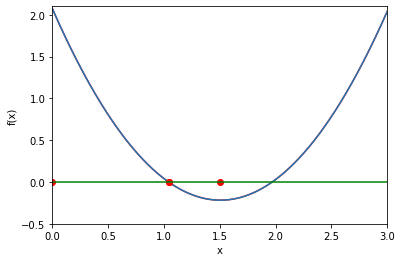

In [90]:
x = np.linspace(0, 3, 1000)
f = [function_for_roots(i)for i in x]
plt.plot(0.0,0,'ro')
plt.plot(1.5,0,'ro')
a = 1.01
b = -3.04
c = 2.07
y = a*x**2 + b*x + c

plt.plot(x,f, color = 'r')
plt.plot(x,y)
plt.plot(x_root, y_root,'ro')
plt.plot(x_root, y_root, 'ro')
plt.ylim([-0.5,2.1])
plt.xlim([0,3])
plt.axhline(y=0.0, color = 'g')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()